<a href="https://colab.research.google.com/github/FarhanKhan1/ML_projects/blob/main/Multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import pandas as pd
import matplotlib

# New Section

In [217]:
df = pd.read_csv("/content/drive/MyDrive/Bengaluru_House_Data.csv")

In [ ]:

df.head()


In [195]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [218]:
#df.drop(df.iloc[30:, :5], inplace=True)
df = df.iloc[:29, :]
#df.drop(df.iloc[29:, :5], inplace=True, axis=1)
#df = df.drop(labels=20, axis=0)
df.head(30)  

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [219]:
df.drop(df.iloc[29:, :5], inplace=True, axis=1)


In [220]:
df


,total_sqft,bath,balcony,price
0,1056,2.0,1.0,39.07
1,2600,5.0,3.0,120.00
2,1440,2.0,3.0,62.00
3,1521,3.0,1.0,95.00
4,1200,2.0,1.0,51.00
5,1170,2.0,1.0,38.00
6,2732,4.0,NaN,204.00
7,3300,4.0,NaN,600.00
8,1310,3.0,1.0,63.25
9,1020,6.0,NaN,370.00


In [221]:
import math
median_bal = math.floor(df.balcony.median())
df.balcony = df.balcony.fillna(median_bal)


In [202]:
median_bal

2

In [222]:
from sklearn import linear_model

In [223]:
model = linear_model.LinearRegression()

In [205]:
import matplotlib as plt

In [206]:
X = df.iloc[:, :3]
Y = df.iloc[:,3:4]

In [207]:
X.head(25)

,total_sqft,bath,balcony
0,1056,2.0,1.0
1,2600,5.0,3.0
2,1440,2.0,3.0
3,1521,3.0,1.0
4,1200,2.0,1.0
5,1170,2.0,1.0
6,2732,4.0,2.0
7,3300,4.0,2.0
8,1310,3.0,1.0
9,1020,6.0,2.0


In [208]:
Y

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
5,38.00
6,204.00
7,600.00
8,63.25
9,370.00


In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [210]:
y_train

,price
15,73.50
11,295.00
17,60.00
1,120.00
4,51.00
5,38.00
2,62.00
24,25.25
3,95.00
23,103.00


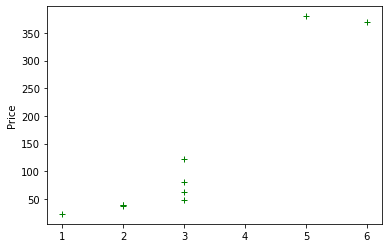

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_test.bath, y_test, 'g+')
plt.ylabel('Price')
plt.show()

In [212]:
#X_train.drop(labels=20, )
#X_train
#y_train
model.fit(X_train[['total_sqft','bath','balcony']], y_train.price)
#model.fit()
#type(X_train)
#y_train
#model.fit(X_train[['total_sqft','bath','balcony']], y_train)

LinearRegression()

In [214]:
model.predict([[1151,2.0,2.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([30.44006554])

In [216]:
model.score(X_train[['total_sqft','bath','balcony']], y_train.price)

0.7794418195303136

In [224]:
model.fit(df[['total_sqft','bath','balcony']], df.price)

LinearRegression()

In [225]:
model.predict([[1151,2.0,2.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([26.95070946])